# Homework 4 -- Name(s) here

*   Muhammad ali 



In this homework, we approach the problem of identifying a small subset of a dataset using unsupervised and supervised methods. The dataset we'll use is a set of newsgroup postings from the early days of the internet.

In a real world application, we often don’t have labels, and clustering and outlier detection are usually applied in settings that don’t have labels. For the clustering part of this homework, you should work without the ground truth labels as much as possible. Often inspecting and visualizing the data is the only way to understand the result of clustering.

However, since we do have ground-truth we could do a post-hoc analysis and determine how well we actually did. You  might explore that after you've done the clustering.

In [182]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

all_df = pd.DataFrame({'Text': newsgroups.data, 'Category Label': newsgroups.target})
all_df['Category Name'] = all_df['Category Label'].map(lambda idx: newsgroups.target_names[idx])
print(all_df['Category Name'].value_counts())
print(all_df['Text'][0])
all_df

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: Category Name, dtype: int64
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme 

,Text,Category Label,Category Name
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space
...,...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,sci.med
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4,comp.sys.mac.hardware
11311,I just installed a DX2-66 CPU in a clone mothe...,3,comp.sys.ibm.pc.hardware
11312,\nWouldn't this require a hyper-sphere. In 3-...,1,comp.graphics


# Task 0: Split the Data (2 points)

Choose any 3-6 categories. Create a new dataframe containing only the rows in those categories.

In [183]:
New_DF = all_df.loc[all_df['Category Name'] == 'sci.space']
New_DF = New_DF.append(all_df.loc[all_df['Category Name'] == 'sci.med'])
New_DF = New_DF .append(all_df.loc[all_df['Category Name'] =='comp.graphics'])
New_DF

,Text,Category Label,Category Name
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space
13,"\n {Description of ""External Tank"" option fo...",14,sci.space
49,"Pat sez;\n\nYeah, but a windscreen cut down mo...",14,sci.space
59,Archive-name: space/new_probes\nLast-modified:...,14,sci.space
119,\nWhere does the shadow come from? There's no...,14,sci.space
...,...,...,...
11235,\n: Can anyone tell me where to find a MPEG vi...,1,comp.graphics
11240,\n For a commerical package try WAVE from Pr...,1,comp.graphics
11249,"Hi everybody,\n\nCan anyone name an anonymous ...",1,comp.graphics
11289,I have a Diamond Speedstar 24X board that I wa...,1,comp.graphics


# Task 1: Vectorization (6 points)

## 1.1 Plain Tfidf

Vectorize the data using TfIdf. Do not change the defaults. What are the top 10 most 'important' (highest tfidf score) words?

In [184]:
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(New_DF['Text'])
print('tf_idf scores: \n', sorted(list(zip(vectorizer.get_feature_names_out(), X.sum(0).getA1())), 
                                 key=lambda x: x[1], reverse=True)[:10])

tf_idf scores: 
 [('the', 188.1060013644012), ('to', 112.73617253048712), ('of', 104.3871046926474), ('and', 90.53250488911111), ('is', 83.72617336784813), ('it', 79.14957849657227), ('in', 73.84218351162802), ('that', 68.48976489689817), ('for', 59.93982943345457), ('you', 58.66565429762063)]


## 1.2 Better Tfidf

Now vectorize again but this time choose reasonable values for some of the parameters, such as stop_words. What are the top 10 most 'important' terms now?

In [67]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(New_DF['Text'])
print('tf_idf scores: \n', sorted(list(zip(vectorizer.get_feature_names_out(), X.sum(0).getA1())), 
                                 key=lambda x: x[1], reverse=True)[:10])

tf_idf scores: 
 [('space', 27.33942679643565), ('know', 26.336500011904242), ('like', 25.22484900115421), ('don', 23.77101528539142), ('just', 22.545499875614777), ('thanks', 22.04626852943363), ('does', 21.222927858870193), ('think', 20.02143269697081), ('edu', 19.824563645356154), ('graphics', 17.864747753003652)]


# Task 2: Dimensionality Reduction and Visualization (8 points)

## 2.1 PCA

Use PCA to reduce your "Better Tfidf" data to 2 dimensions and plot the data. Color each point by its category. Make sure the plot has a useful legend.

Do you see anything notable?

In [185]:
vectorizer =TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(New_DF['Text'])
pca = PCA(n_components=2)
PCA_X = pca.fit_transform(X.toarray())

(1771, 2)
(1771, 26426)


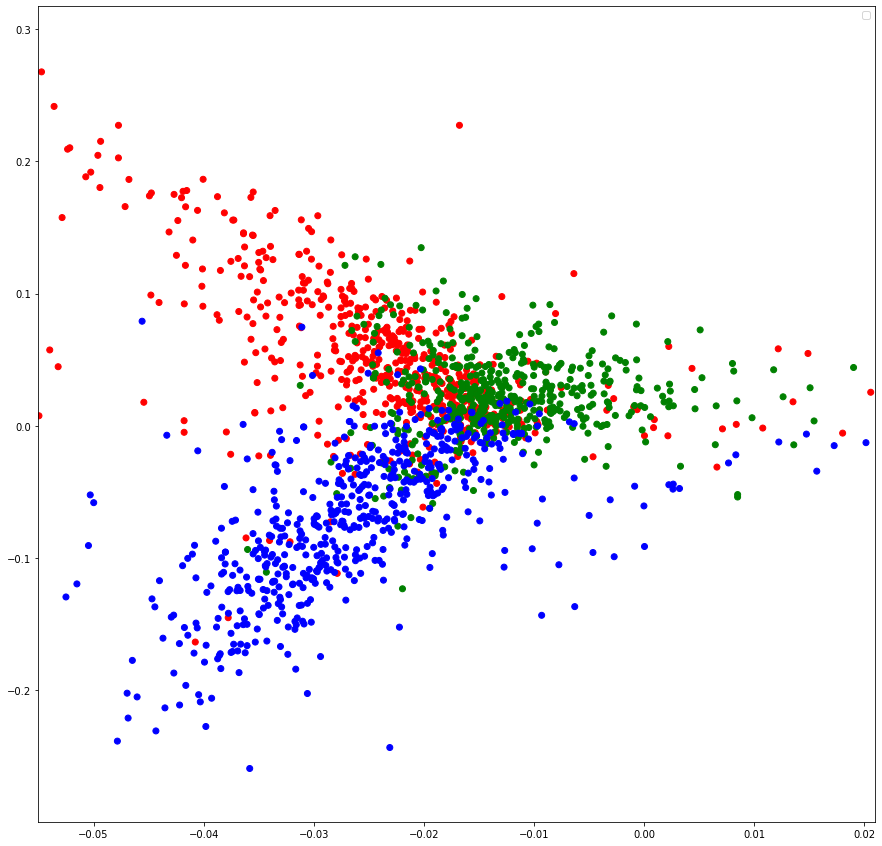

In [186]:
print(PCA_X.shape)
print(X.shape)

x = []
y = []
for t in PCA_X:
    x.append(t[0])
    y.append(t[1])
colors = {'sci.space':'red', 'sci.med':'green', 'comp.graphics':'blue'}
fig , ax= plt.subplots(1)
ax.scatter(x,y, c=New_DF['Category Name'].map(colors))
fig.set_size_inches(15,15)
plt.xlim(-.055, .021)
plt.legend()

## 2.2 T-SNE

Now do the same with T-SNE. See if tuning the perplexity parameter helps obtaining a better visualization.

Do you see anything notable?

Note: You may want to re-run Tfidf and set the max_features parameter to some reasonable value (e.g., 100). Otherwise TSNE may take a very long time.

In [159]:
vectorizer =TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(New_DF['Text'])
tsne = TSNE()
TSNE_X= tsne.fit_transform(X.toarray())

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1771, 2)
(1771, 26426)
[[ -1.2391207   1.8204427]
 [-34.51822   -15.714278 ]
 [ -1.1727427   5.255633 ]
 ...
 [120.87863    46.892204 ]
 [-88.80121    32.14263  ]
 [103.67087    96.82416  ]]


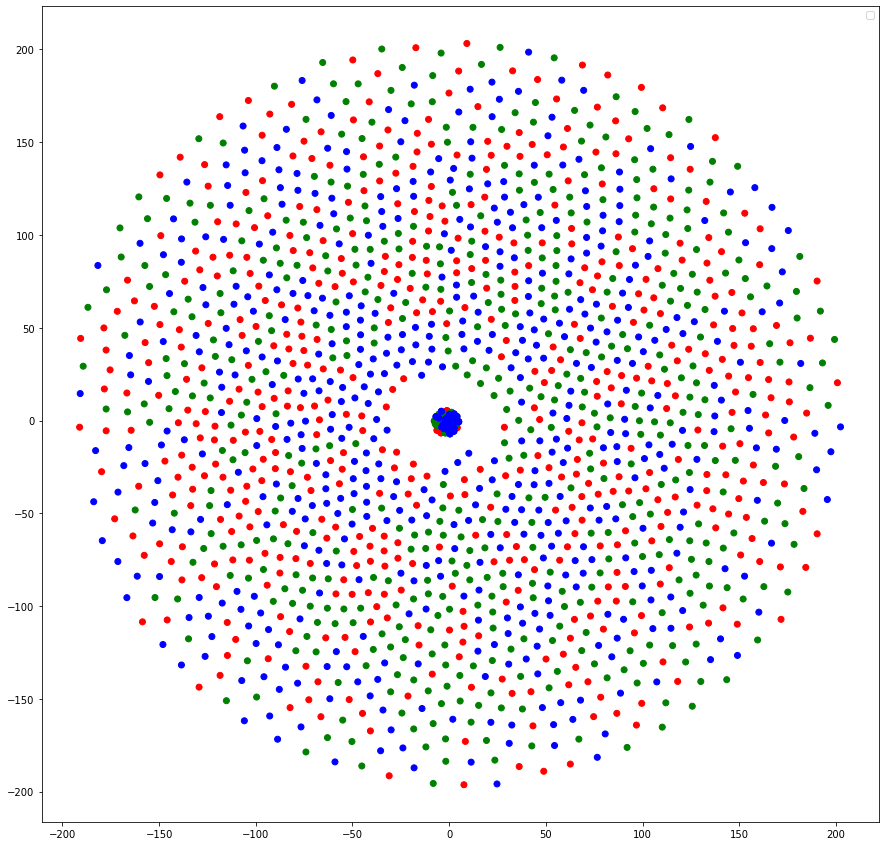

In [189]:
print(TSNE_X.shape)
print(X.shape)
print(TSNE_X)

x = []
y = []
for t in TSNE_X:
    x.append(t[0])
    y.append(t[1])
colors = {'sci.space':'red', 'sci.med':'green', 'comp.graphics':'blue'}
fig , ax= plt.subplots(1)
ax.scatter(x,y, c=New_DF['Category Name'].map(colors))
fig.set_size_inches(15,15)
plt.legend()